In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [6]:
df.shape

(1460, 3)

In [7]:
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:>

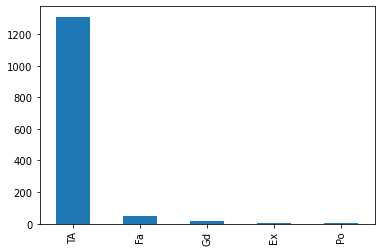

In [8]:
df.GarageQual.value_counts().sort_values(ascending=False).plot.bar()

In [9]:
df.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

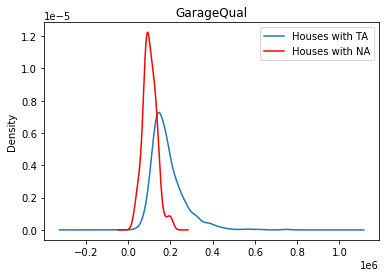

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

df [df['GarageQual' ]=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df[ 'GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()

labels = ['Houses with TA', 'Houses with NA']

ax.legend(lines, labels, loc='best')

plt.title('GarageQual')




In [11]:
temp = df[df['GarageQual']=='TA']['SalePrice']
temp

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1311, dtype: int64

In [12]:
df.GarageQual.fillna('TA',inplace=True)
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


<AxesSubplot:>

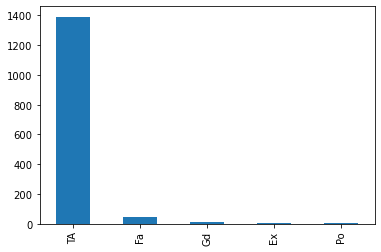

In [13]:
df.GarageQual.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

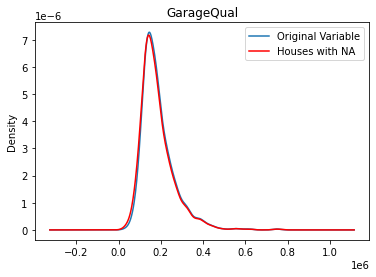

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df[ 'GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()

labels = ['Original Variable', 'Houses with NA']

ax.legend(lines, labels, loc='best')

plt.title('GarageQual')


<AxesSubplot:>

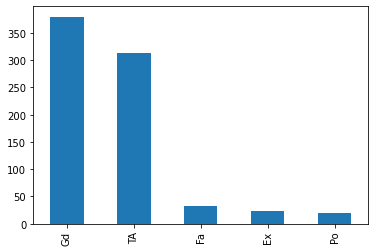

In [15]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [16]:
df['FireplaceQu'].isnull().sum()

690

In [17]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

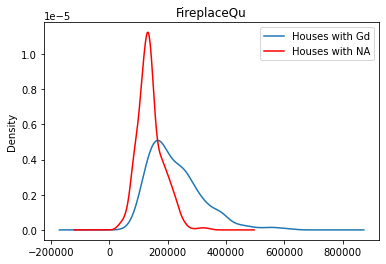

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [19]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [20]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<AxesSubplot:>

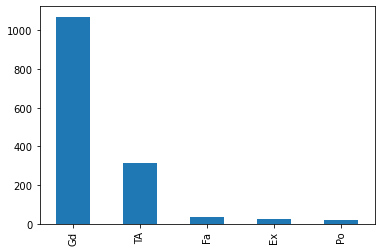

In [21]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

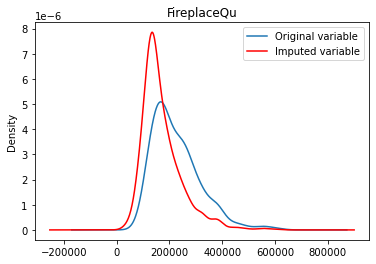

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [23]:

df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [24]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [25]:

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [26]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# Impute with missing

In [27]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

Text(0, 0.5, 'Number of houses')

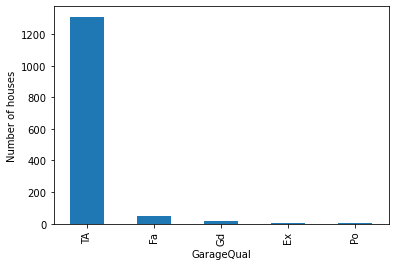

In [28]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [29]:
df.GarageQual.fillna('Missing',inplace=True)

<AxesSubplot:>

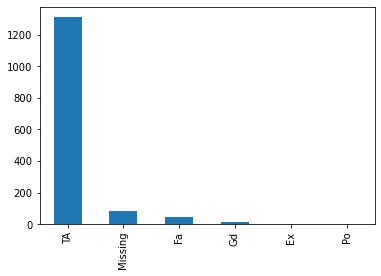

In [30]:
df.GarageQual.value_counts().sort_values(ascending=False).plot.bar()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

### replace nan to missing using simple imputer

In [32]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [33]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)